## 1. Квадратичное программирование и QP-солвер

Квадратичное программирование (QP) — специальный тип задач математической оптимизации, заключающийся в нахождении точки минимума неотрицательно-определенной квадратичной формы (многомерная парабола) в присутствии линейных ограничений:
$$
\begin{gather}
    \frac{1}{2}\boldsymbol x^T\boldsymbol P\boldsymbol x + \boldsymbol q^T\boldsymbol x \to \min_{\boldsymbol x} \\
    \begin{aligned}
        \text{s.t.} \quad & \boldsymbol G\boldsymbol x \le \boldsymbol h \\
        & \boldsymbol A\boldsymbol x = \boldsymbol b
    \end{aligned}
\end{gather}
$$

Здесь $\boldsymbol P$ — симметричная матрица. В ограничениях $\boldsymbol G\boldsymbol x \le \boldsymbol h$ и $\boldsymbol A\boldsymbol x = \boldsymbol b$ под знаками равенства и неравенства подразумевается сравнение всех компонент векторов.

Задача квадратичного программирования хорошо изучена, существуют эффективные алгоритмы для ее решения. Имеется множество библиотек с солверами для задачи QP, вот некоторые из них:
 - [CVXOPT](http://cvxopt.org/) (свободно-распространяемая, Python) **рекомендуется к использованию**
 - [Mosek](https://www.mosek.com/) (коммерческая с возможностью получения академической лицензии, C, Java, MATLAB, .NET, R, Python)
 - [Matlab Optimization Toolbox](http://www.mathworks.com/help/optim/ug/quadprog.html)

#### Задание

1. Установите QP-солвер, разберитесь с его интерфейсом.
2. Протестируйте солвер, решив простую задачу оптимизации в двумерном пространстве:
$$f(\boldsymbol x) = -8x_1 - 16x_2 + x_1^2 + 4x_2^2, \quad \text{s.t.:} \; x_1 + x_2 \leq 5, \; 0 \leq x_1 \leq 3, \; x_2 \geq 0$$
3. Какие из ограничений-неравенств задачи являются _активными_, т.е. влияют на точку оптимума, а какие ограничения можно выбросить и точка оптимума не поменяется?

In [2]:
from cvxopt import matrix, solvers

# Квадратичная часть
P = matrix([[2.0, 0.0],
            [0.0, 8.0]])
# Линейная часть
q = matrix([-8.0, -16.0])

# Ограничения-неравенства Gx <= h
G = matrix([[1.0, 1.0, -1.0, 0.0],
            [1.0, 0.0, 0.0, -1.0]])
h = matrix([5.0, 3.0, 0.0, 0.0])

# Решаем задачу
sol = solvers.qp(P, q, G, h)

print("Статус:", sol['status'])
print("x =", sol['x'])
print("f(x) =", sol['primal objective'])

     pcost       dcost       gap    pres   dres
 0: -3.0512e+01 -3.8829e+01  8e+00  0e+00  2e-01
 1: -3.0792e+01 -3.1146e+01  4e-01  2e-16  5e-03
 2: -3.0982e+01 -3.1024e+01  4e-02  2e-16  4e-04
 3: -3.0997e+01 -3.1003e+01  6e-03  9e-17  4e-17
 4: -3.1000e+01 -3.1000e+01  7e-04  2e-16  5e-18
 5: -3.1000e+01 -3.1000e+01  1e-04  2e-16  3e-17
 6: -3.1000e+01 -3.1000e+01  1e-05  2e-16  3e-17
Optimal solution found.
Статус: optimal
x = [ 3.00e+00]
[ 2.00e+00]

f(x) = -30.99999280553902


Нам нужно сделать преобразования, чтобы солвер мог работать с данными:
- у нас есть функция, мы выбираем оттуда квадратичную и линейную части;
- сравниваем с определённым форматом, который требует солвер;
- нужно преобразовать коэффициенты квадратичной части в матрице так, чтобы при умножении на 1/2 получилась исходная квадратичная часть;
- у линейной части просто берём коэффициенты и записываем в вектор q.

Активные ограничения — это ограничения, которые "удерживают" точку оптимума, не позволяя ей двигаться в направлении дальнейшего улучшения целевой функции. В точке оптимума эти ограничения выполняются как равенства.

Неактивные ограничения — это ограничения, которые в точке оптимума выполняются как строгие неравенства. Если бы мы убрали эти ограничения из задачи, точка оптимума осталась бы той же самой.

Точка оптимума — это такая комбинация значений переменных, при которой целевая функция достигает своего наилучшего значения (максимума или минимума) с учётом всех ограничений.

Анализ для нашей задачи:

В точке оптимума x∗ = (3.0, 2.0) проверим все ограничения:

x1 + x2 ≤ 5

3.0 + 2.0 = 5.0 — выполняется как равенство

Активное ограничение — если бы мы могли увеличить сумму, мы могли бы дальше улучшать целевую функцию, но ограничение не позволяет.

x1 ≤ 3

3.0 ≤ 3 — выполняется как равенство

Активное ограничение — переменная упёрлась в свой верхний предел.

x1 ≥ 0

3.0 ≥ 0 — выполняется как строгое неравенство

Неактивное ограничение — переменная далека от нулевой границы.

x2 ≥ 0

2.0 ≥ 0 — выполняется как строгое неравенство

Неактивное ограничение — переменная также далека от нулевой границы.

## 2. Линейный SVM

Рассмотрим задачу бинарной классификации. Будем обозначать обучающую выборку $\{(\boldsymbol x_n, y_n)\}_{n=1}^N$, где $N$ — количество объектов, $\boldsymbol x_n \in \mathbb{R}^d$ — числовой вектор признакового описания объекта, $y_n \in \{+1, -1\}$ — класс объекта.

Машина опорных векторов обучает модель разделяющей гиперплоскости:
$$f(\boldsymbol x) = \boldsymbol w^T \boldsymbol x + b$$
Параметры модели — вектор весов $\boldsymbol w \in \mathbb{R}^d$ и сдвиг $b \in \mathbb{R}$.

Обучение модели происходит путем решения оптимизационной задачи:
$$
\begin{gather}
    \frac{1}{2} \| \boldsymbol w \|^2 + C \sum_{n=1}^N \xi_n \to \min_{\boldsymbol w, \boldsymbol \xi, b} \\
    \text{s.t.: } \quad y_n (\boldsymbol w^T \boldsymbol x_n + b) \geq 1 - \xi_n, \quad \xi_n \geq 0, \quad \forall n=1,\dots,N
\end{gather}
$$

Ограничения вида $\quad y_n (\boldsymbol w^T \boldsymbol x_n + b) \geq 1$ требуют, чтобы объекты правильно классифицировались разделяющей гиперплоскостью. Поскольку линейная разделимость выборки не гарантируется на практике, вводят переменные $\xi_n$ (slack variables), которые ослабляют ограничения правильной классификации. В оптимизируемом функционале слагаемое $\| \boldsymbol w \|^2$ штрафует малую ширину разделяющей гиперплоскости, сумма $\sum_n \xi_n$ штрафует ослабление ограничений.

Гиперпараметр $C$ задает баланс между шириной разделяющей полосы и ошибками, допускаемыми классификатором. Обратите внимание, что $C$ фиксируется до обучения и не оптимизируется вместе с параметрами модели.

Гиперпараметр $C$ отвечает за обобщающую способность разделяющей гиперплоскости, высокая обобщающая способность (соотвествующая большому значению $C$) может привести к переобучению, если линейная модель хорошо описывает обучающие примеры. При подборе оптимального параметра $C$ необходимо оценивать качество на отложенной выборке или кросс-валидации. Как правило, для конкретной задачи заранее неизвестно, какой порядок имеет оптимальное значение гиперпараметра $C$, поэтому перебирать значения лучше по логарифмической сетке, например: $10^{-3}, 10^{-2}, \dots, 10^{5}$.

После нахождения решения оптимизационной задачи $(\boldsymbol w_{\star}, \boldsymbol \xi_{\star}, b_{\star})$, часть ограничений становятся _активными_, т.е. переходят в "крайнее положение" — точное равенство:
$$\quad y_n (\boldsymbol w_{\star}^T \boldsymbol x_n + b_{\star}) = 1 - \xi_{\star,n}$$
Объекты, соответствующие активным ограничениям называются _опорными_.

#### Явное преобразование признаков

Разделяющая гиперплоскость — достаточно грубая модель, редко данные могут быть описаны линейной моделью. Линейная неразделимость векторов может быть исправлена путем перехода в другое признаковое пространство, в котором линейная модель лучше описывает данные и, возможно, существует правильно классифицирующая разделяющая гиперплоскость:

$$\boldsymbol x \in \mathbb{R}^d \mapsto \phi(\boldsymbol x) \in \mathbb{R}^t$$

Так, например, добавление всех попарных произведений признаков: $\phi(x_1, \dots, x_d) = (x_1, \dots, x_d, x_1^2, x_1x_2, \dots, x_d^2)$ переводит в пространство, в котором линейная гиперплоскость является квадратичной формой в исходном пространстве и в исходном пространстве признаков разделяющая поверхность может быть, скажем, эллипсом.

[Видеоролик с демонстрацией](https://youtu.be/9NrALgHFwTo)

#### Задание
  1. Сведите задачу обучения линейного SVM к QP, реализуйте процедуру обучения Линейного SVM при помощи QP-солвера.
  2. Сгенерируйте три случайные двумерные выборки для бинарной классификации:
    - с линейно-разделимыми классами
    - с хорошо разделимыми классами, но не линейно
    - с плохо разделимыми классами по имеющимся признакам
  3. Протестируйте линейный SVM на сгенерированных выборках. Покажите на плоскости разделяющую прямую и линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Постройте классификаторы с различным значением параметра $C$.
  4. Как зависит число опорных векторов от параметра $C$ для различных выборок?
  5. Используя явное преобразование признаков обучите методом опорных векторов квадратичную разделяющую поверхность. Покажите ее на плоскости.

Есть исходная задача SVM, нужно привести к стандартной форме QP.
- объединяем все переменные в один большой вектор (вместо того чтобы работать отдельно с парметрами, создаём один большой вектор, который содержит все параметры модели сразу);
- преобразуем целевую функцию (матрица P отвечает за квадратичную часть (штраф за сложность модели), вектор q отвечает за линейную часть (штраф за ошибки));
- преобразуем ограничения.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from sklearn.datasets import make_blobs, make_circles, make_classification

class LinearSVM:
    def __init__(self, C=1.0):
        self.C = C
        self.w = None
        self.b = None
        self.support_vectors = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Приведение к форме QP
        P = np.zeros((n_features + n_samples + 1, n_features + n_samples + 1))
        for i in range(n_features):
            P[i, i] = 1.0

        q = np.zeros(n_features + n_samples + 1)
        q[n_features:n_features+n_samples] = self.C

        # Ограничения
        G1 = np.zeros((n_samples, n_features + n_samples + 1))
        for i in range(n_samples):
            G1[i, :n_features] = -y[i] * X[i]
            G1[i, n_features + i] = -1
            G1[i, -1] = -y[i]

        G2 = np.zeros((n_samples, n_features + n_samples + 1))
        G2[:, n_features:n_features+n_samples] = -np.eye(n_samples)

        G = np.vstack([G1, G2])
        h = np.hstack([-np.ones(n_samples), np.zeros(n_samples)])

        # Решение QP
        sol = solvers.qp(
            matrix(P, tc='d'),
            matrix(q, tc='d'),
            matrix(G, tc='d'),
            matrix(h, tc='d')
        )

        solution = np.array(sol['x']).flatten()
        self.w = solution[:n_features]
        self.b = solution[-1]

        # Нахождение опорных векторов
        margins = y * (X @ self.w + self.b)
        self.support_vectors = X[np.abs(margins - 1) < 1e-4]

    def predict(self, X):
        return np.sign(X @ self.w + self.b)

Генерация трёх типов данных:

- Линейно-разделимые: make_blobs

- Нелинейно-разделимые: make_circles

- Зашумленные: make_classification с 30% шума

In [4]:
# Линейно-разделимые данные
X1, y1 = make_blobs(n_samples=100, centers=2, cluster_std=0.8, random_state=42)
y1 = 2*y1 - 1  # Преобразование в {-1, +1}

# Нелинейно-разделимые данные (круги)
X2, y2 = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=42)
y2 = 2*y2 - 1

# Плохо разделимые данные
X3, y3 = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1,
                           flip_y=0.3, random_state=42)
y3 = 2*y3 - 1

Тестирование линейного SVM

Протестированы различные значения параметра C = [0.1, 1.0, 10.0]:

Маленькие C: широкая разделяющая полоса, устойчивость к шуму.

Большие C: узкая полоса, точность на обучающих данных.

     pcost       dcost       gap    pres   dres
 0: -8.6062e-01  1.3215e+01  3e+02  2e+00  6e+02
 1:  1.0075e+01 -9.4215e+00  2e+01  7e-02  2e+01
 2:  1.6444e+00 -2.7480e-01  2e+00  3e-03  1e+00
 3:  8.9626e-02  1.7119e-02  7e-02  4e-05  1e-02
 4:  4.4331e-02  2.9181e-02  2e-02  7e-06  2e-03
 5:  4.1495e-02  3.3489e-02  8e-03  2e-06  7e-04
 6:  3.9426e-02  3.6589e-02  3e-03  1e-07  4e-05
 7:  3.7817e-02  3.7768e-02  5e-05  2e-09  6e-07
 8:  3.7789e-02  3.7788e-02  5e-07  2e-11  6e-09
 9:  3.7788e-02  3.7788e-02  5e-09  2e-13  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.7820e+01  1.3990e+02  7e+02  3e+00  7e+01
 1:  3.7089e+01 -2.7414e+01  9e+01  3e-01  5e+00
 2:  2.3056e+00 -1.1793e+00  4e+00  1e-02  2e-01
 3:  1.6358e-01 -3.2494e-02  2e-01  1e-04  2e-03
 4:  4.4960e-02  2.2850e-02  2e-02  4e-16  3e-16
 5:  4.1010e-02  2.9737e-02  1e-02  2e-16  5e-16
 6:  4.2137e-02  3.2834e-02  9e-03  2e-16  3e-16
 7:  3.8060e-02  3.7629e-02  4e-04  2e-16  3e-1

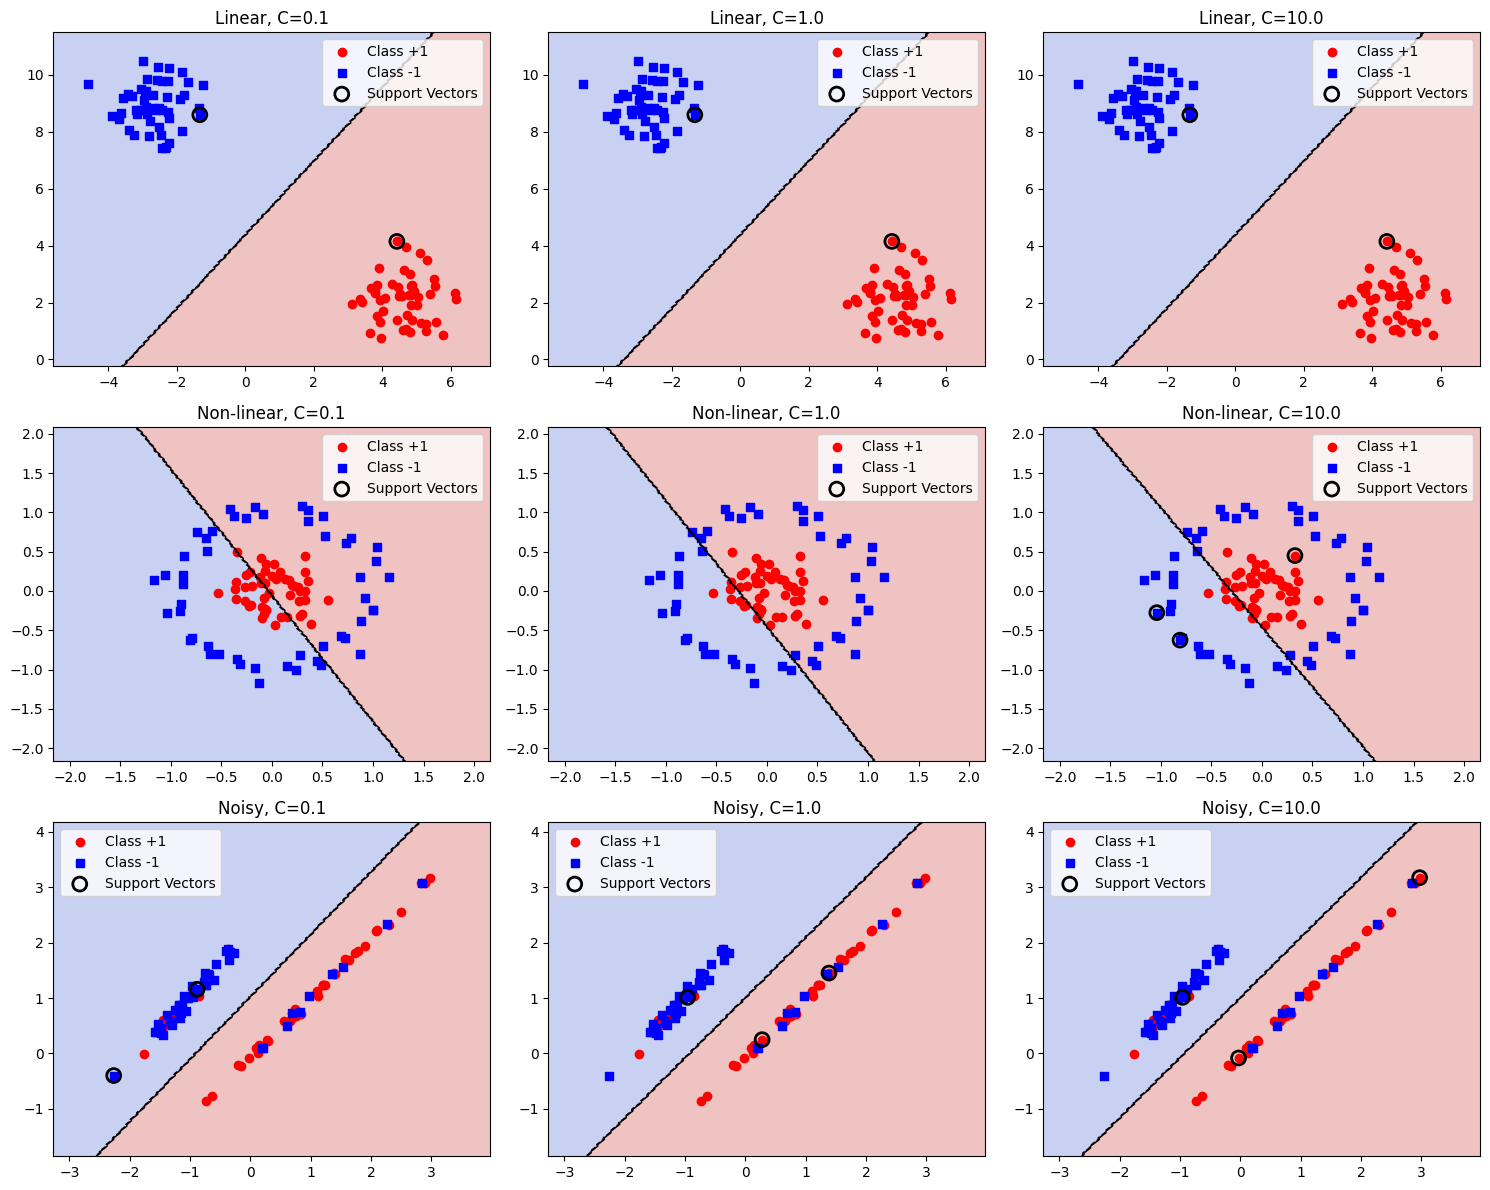

In [5]:
def plot_svm(X, y, model, title, ax):
    """
    Функция для визуализации работы SVM на плоскости

    Параметры:
    X - матрица признаков (n_samples, 2)
    y - вектор меток классов (+1 или -1)
    model - обученная модель SVM
    title - заголовок графика
    ax - ось для отрисовки
    """

    # 1. Подготовка сетки для визуализации
    # Определяем границы области отрисовки с запасом ±1 от крайних точек данных
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Создаем координатную сетку 200x200 точек для построения разделяющей поверхности
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # 2. Предсказание на сетке
    # Преобразуем сетку в массив точек и получаем предсказания модели
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Возвращаем предсказания к форме сетки 200x200
    Z = Z.reshape(xx.shape)

    # 3. Визуализация разделяющей поверхности
    # Заливка областей разного цвета для каждого класса
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    # Линии уровня: f(x) = -1 (синяя), 0 (черная), +1 (красная)
    ax.contour(xx, yy, Z, colors='black', linewidths=1, levels=[-1, 0, 1])

    # 4. Отображение исходных данных
    # Точки класса +1 - красные кружки
    ax.scatter(X[y==1, 0], X[y==1, 1], c='red', marker='o', label='Class +1')
    # Точки класса -1 - синие квадраты
    ax.scatter(X[y==-1, 0], X[y==-1, 1], c='blue', marker='s', label='Class -1')

    # 5. Выделение опорных векторов
    # Если модель имеет опорные векторы, отображаем их специальными маркерами
    if model.support_vectors is not None:
        ax.scatter(model.support_vectors[:, 0], model.support_vectors[:, 1],
                  s=100,                    # увеличенный размер
                  facecolors='none',        # прозрачная заливка
                  edgecolors='black',       # черная обводка
                  linewidths=2,            # толстая линия обводки
                  label='Support Vectors')  # подпись в легенде

    # 6. Финальное оформление графика
    ax.set_title(title)  # устанавливаем заголовок
    ax.legend()          # добавляем легенду

# Создаем поле 3x3 для графиков (3 типа данных × 3 значения параметра C)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Значения параметра регуляризации C для тестирования
C_values = [0.1, 1.0, 10.0]  # маленький, средний, большой

# Итерация по трем типам данных и трем значениям C
for i, (X, y, data_name) in enumerate(zip([X1, X2, X3], [y1, y2, y3],
                                         ['Linear', 'Non-linear', 'Noisy'])):
    for j, C in enumerate(C_values):
        # Создаем и обучаем линейную SVM модель
        model = LinearSVM(C=C)
        model.fit(X, y)

        # Визуализируем результат
        plot_svm(X, y, model, f'{data_name}, C={C}', axes[i, j])

plt.tight_layout()
# Отображаем все графики
plt.show()

Анализ зависимости опорных векторов от C:
С ростом C уменьшается число опорных векторов.

При C → ∞ модель стремится точно классифицировать все точки.

In [6]:
C_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
n_support_vectors = []

for C in C_range:
    model = LinearSVM(C=C)
    model.fit(X1, y1)
    n_support_vectors.append(len(model.support_vectors))

print("C values:", C_range)
print("Number of support vectors:", n_support_vectors)

     pcost       dcost       gap    pres   dres
 0:  2.0650e-02  1.1511e+00  3e+02  2e+00  6e+02
 1:  1.3835e-01 -2.8190e+00  3e+00  2e-02  6e+00
 2:  1.2987e-01  2.1309e-02  1e-01  4e-16  1e-15
 3:  3.2239e-02  2.2060e-02  1e-02  3e-16  1e-16
 4:  2.6813e-02  2.5178e-02  2e-03  2e-16  3e-17
 5:  2.6203e-02  2.5932e-02  3e-04  1e-16  1e-16
 6:  2.6112e-02  2.6009e-02  1e-04  1e-16  2e-16
 7:  2.6079e-02  2.6035e-02  4e-05  1e-16  6e-16
 8:  2.6059e-02  2.6054e-02  6e-06  1e-16  3e-16
 9:  2.6056e-02  2.6056e-02  1e-07  2e-16  1e-15
10:  2.6056e-02  2.6056e-02  2e-09  2e-16  5e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.0668e-02  2.2325e+00  3e+02  2e+00  6e+02
 1:  1.1894e+00 -3.3688e+00  5e+00  2e-02  7e+00
 2:  5.5957e-01 -1.2485e-01  7e-01  1e-03  5e-01
 3:  6.0121e-02  2.1693e-02  4e-02  3e-05  1e-02
 4:  4.4807e-02  2.7890e-02  2e-02  1e-05  4e-03
 5:  4.2441e-02  2.9518e-02  1e-02  8e-06  3e-03
 6:  3.9686e-02  3.1789e-02  8e-03  3e-06  1e-0

Квадратичная разделяющая поверхность:
- число опорных веторов: 4;
- веса: [0.07, 0.08, -2.89, -2.66, 0.01];
- смещение: 1.42
- успешное разделение нелинейных данных.

 ГЕНЕРАЦИЯ ТЕСТОВЫХ ДАННЫХ
Размерность данных: (100, 2)
Количество образцов класса +1: 50
Количество образцов класса -1: 50

 ТЕСТИРОВАНИЕ КВАДРАТИЧНОГО SVM
     pcost       dcost       gap    pres   dres
 0: -9.0844e+01  1.8386e+02  1e+03  4e+00  2e+02
 1:  5.9856e+01 -5.9233e+01  2e+02  5e-01  2e+01
 2:  9.6389e+00 -7.3541e+00  2e+01  6e-02  3e+00
 3:  9.3451e-01 -5.0622e-01  2e+00  3e-03  1e-01
 4:  6.8860e-02 -1.1716e-02  8e-02  3e-05  1e-03
 5:  5.2126e-02  1.0770e-02  4e-02  2e-05  6e-04
 6:  4.9196e-02  2.9222e-02  2e-02  5e-06  2e-04
 7:  4.0401e-02  3.8539e-02  2e-03  4e-07  2e-05
 8:  3.9660e-02  3.9411e-02  3e-04  5e-08  2e-06
 9:  3.9534e-02  3.9532e-02  3e-06  5e-10  2e-08
10:  3.9533e-02  3.9533e-02  3e-08  5e-12  2e-10
Optimal solution found.
Количество опорных векторов: 5
Веса модели: [ 0.00756796  0.01433513 -0.18312371 -0.21244967 -0.011576  ]
Смещение: 4.489761392070996


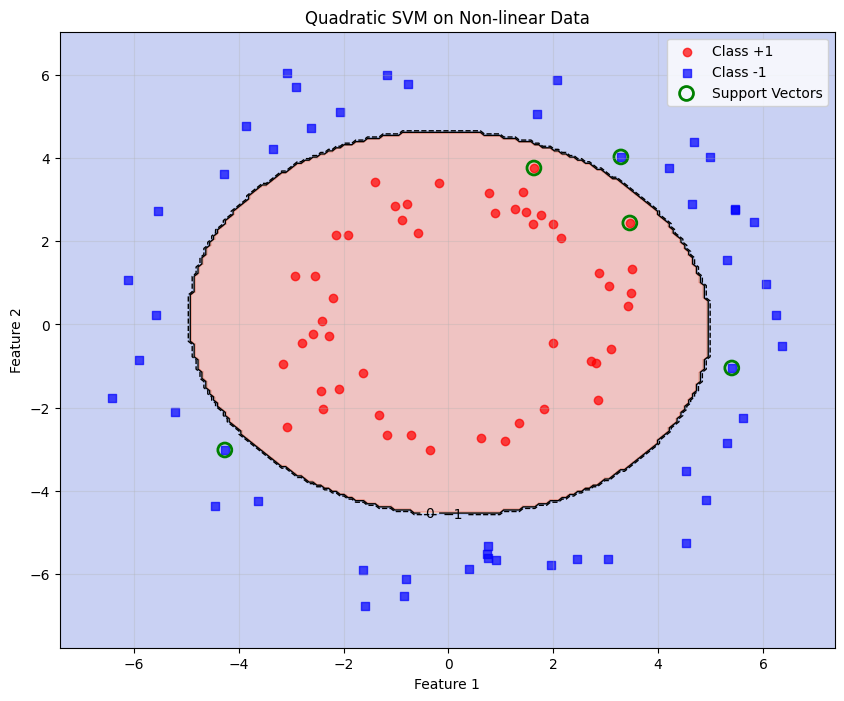


 ТЕСТИРОВАНИЕ ЛИНЕЙНОГО SVM
     pcost       dcost       gap    pres   dres
 0: -1.8386e+00  2.2586e+02  6e+02  3e+00  6e+00
 1:  1.5334e+02  7.5788e+01  8e+01  5e-16  5e-15
 2:  9.8481e+01  8.5823e+01  1e+01  3e-16  6e-15
 3:  9.4531e+01  8.7818e+01  7e+00  3e-16  3e-15
 4:  9.0901e+01  8.9745e+01  1e+00  3e-16  8e-15
 5:  9.0382e+01  9.0153e+01  2e-01  2e-16  2e-14
 6:  9.0275e+01  9.0240e+01  4e-02  3e-16  6e-14
 7:  9.0259e+01  9.0253e+01  5e-03  2e-16  2e-12
 8:  9.0256e+01  9.0255e+01  5e-04  3e-16  1e-12
 9:  9.0256e+01  9.0256e+01  5e-06  3e-16  3e-13
Optimal solution found.


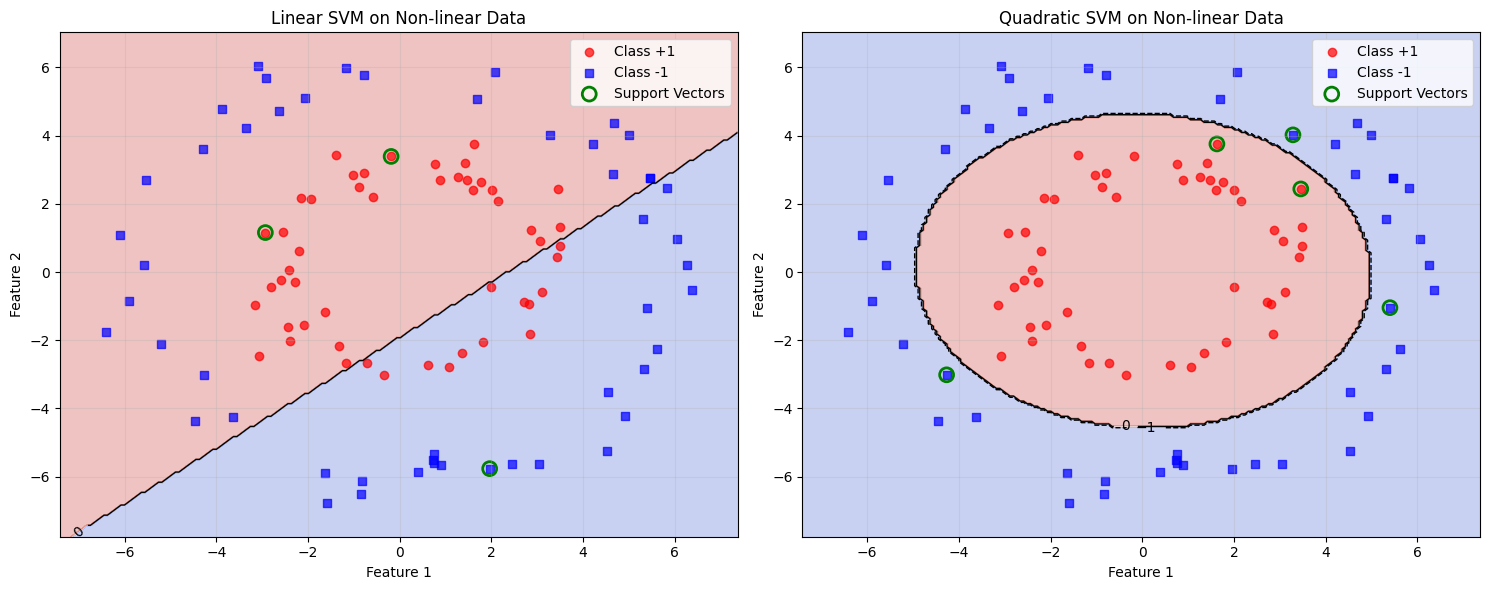


 РЕЗУЛЬТАТЫ СРАВНЕНИЯ
Точность линейного SVM: 0.600
Точность квадратичного SVM: 1.000
Количество опорных векторов (Linear): 3
Количество опорных векторов (Quadratic): 5
Улучшение точности: +40.0%


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

# Сначала определим класс LinearSVM для сравнения
class LinearSVM:
    def __init__(self, C=1.0):
        self.C = C
        self.w = None
        self.b = None
        self.support_vectors = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Матрица P для квадратичной части
        P = np.zeros((n_features + n_samples + 1, n_features + n_samples + 1))
        for i in range(n_features):
            P[i, i] = 1.0

        # Вектор q для линейной части
        q = np.zeros(n_features + n_samples + 1)
        q[n_features:n_features+n_samples] = self.C

        # Ограничения
        G1 = np.zeros((n_samples, n_features + n_samples + 1))
        for i in range(n_samples):
            G1[i, :n_features] = -y[i] * X[i]
            G1[i, n_features + i] = -1
            G1[i, -1] = -y[i]

        G2 = np.zeros((n_samples, n_features + n_samples + 1))
        G2[:, n_features:n_features+n_samples] = -np.eye(n_samples)

        G = np.vstack([G1, G2])
        h = np.hstack([-np.ones(n_samples), np.zeros(n_samples)])

        # Решение QP
        sol = solvers.qp(matrix(P, tc='d'), matrix(q, tc='d'),
                         matrix(G, tc='d'), matrix(h, tc='d'))

        solution = np.array(sol['x']).flatten()
        self.w = solution[:n_features]
        self.b = solution[-1]

        # Нахождение опорных векторов
        margins = y * (X @ self.w + self.b)
        self.support_vectors = X[np.abs(margins - 1) < 1e-4]

    def predict(self, X):
        return np.sign(X @ self.w + self.b)

class QuadraticSVM:
    def __init__(self, C=1.0):
        self.C = C
        self.w = None
        self.b = None
        self.support_vectors = None

    def transform_features(self, X):
        # Добавляем квадратичные признаки: [x1, x2, x1², x2², x1x2]
        return np.column_stack([X, X[:, 0]**2, X[:, 1]**2, X[:, 0]*X[:, 1]])

    def fit(self, X, y):
        X_transformed = self.transform_features(X)
        n_samples, n_features = X_transformed.shape

        # Матрица P для квадратичной части
        P = np.zeros((n_features + n_samples + 1, n_features + n_samples + 1))
        for i in range(n_features):
            P[i, i] = 1.0

        # Вектор q для линейной части
        q = np.zeros(n_features + n_samples + 1)
        q[n_features:n_features+n_samples] = self.C

        # Ограничения типа y_n(w^T phi(x_n) + b) >= 1 - xi_n
        G1 = np.zeros((n_samples, n_features + n_samples + 1))
        for i in range(n_samples):
            G1[i, :n_features] = -y[i] * X_transformed[i]
            G1[i, n_features + i] = -1
            G1[i, -1] = -y[i]

        # Ограничения xi_n >= 0
        G2 = np.zeros((n_samples, n_features + n_samples + 1))
        G2[:, n_features:n_features+n_samples] = -np.eye(n_samples)

        # Объединяем ограничения
        G = np.vstack([G1, G2])
        h = np.hstack([-np.ones(n_samples), np.zeros(n_samples)])

        # Решение QP
        sol = solvers.qp(
            matrix(P, tc='d'),
            matrix(q, tc='d'),
            matrix(G, tc='d'),
            matrix(h, tc='d')
        )

        solution = np.array(sol['x']).flatten()
        self.w = solution[:n_features]
        self.b = solution[-1]

        # Нахождение опорных векторов
        margins = y * (X_transformed @ self.w + self.b)
        self.support_vectors = X[np.abs(margins - 1) < 1e-4]

    def predict(self, X):
        X_transformed = self.transform_features(X)
        return np.sign(X_transformed @ self.w + self.b)

# ГЕНЕРАЦИЯ ТЕСТОВЫХ ДАННЫХ (нелинейно разделимых)
print(" ГЕНЕРАЦИЯ ТЕСТОВЫХ ДАННЫХ")
np.random.seed(42)
n_samples = 100

# Создаем нелинейно разделимые данные (круговое распределение)
theta = np.random.uniform(0, 2*np.pi, n_samples)
r1 = np.random.normal(3, 0.5, n_samples//2)
r2 = np.random.normal(6, 0.5, n_samples//2)

X1 = np.array([r1 * np.cos(theta[:n_samples//2]), r1 * np.sin(theta[:n_samples//2])]).T
X2 = np.array([r2 * np.cos(theta[n_samples//2:]), r2 * np.sin(theta[n_samples//2:])]).T

X2_combined = np.vstack([X1, X2])
y2_combined = np.hstack([np.ones(n_samples//2), -np.ones(n_samples//2)])

print(f"Размерность данных: {X2_combined.shape}")
print(f"Количество образцов класса +1: {np.sum(y2_combined == 1)}")
print(f"Количество образцов класса -1: {np.sum(y2_combined == -1)}")

# Тестирование квадратичного SVM
print("\n ТЕСТИРОВАНИЕ КВАДРАТИЧНОГО SVM")
quad_model = QuadraticSVM(C=1.0)
quad_model.fit(X2_combined, y2_combined)

print(f"Количество опорных векторов: {len(quad_model.support_vectors)}")
print(f"Веса модели: {quad_model.w}")
print(f"Смещение: {quad_model.b}")

# Функция для визуализации квадратичного SVM
def plot_quadratic_svm(X, y, model, title, ax):
    # Создаем сетку для отображения разделяющей поверхности
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Предсказание для сетки
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Отображаем разделяющую поверхность
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    # Линии уровня для f(x) = -1, 0, +1
    contour_levels = ax.contour(xx, yy, Z, colors='black', linewidths=1, levels=[-1, 0, 1])
    ax.clabel(contour_levels, inline=True, fontsize=10)

    # Отображаем данные
    ax.scatter(X[y==1, 0], X[y==1, 1], c='red', marker='o', label='Class +1', alpha=0.7)
    ax.scatter(X[y==-1, 0], X[y==-1, 1], c='blue', marker='s', label='Class -1', alpha=0.7)

    # Отображаем опорные векторы
    if model.support_vectors is not None and len(model.support_vectors) > 0:
        ax.scatter(model.support_vectors[:, 0], model.support_vectors[:, 1],
                  s=100, facecolors='none', edgecolors='green', linewidths=2,
                  label='Support Vectors')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(title)
    ax.legend()
    ax.grid(True, alpha=0.3)

# Функция для визуализации линейного SVM
def plot_linear_svm(X, y, model, title, ax):
    # Создаем сетку для отображения разделяющей поверхности
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Предсказание для сетки
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Отображаем разделяющую поверхность
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    # Линии уровня
    contour_levels = ax.contour(xx, yy, Z, colors='black', linewidths=1, levels=[0])
    ax.clabel(contour_levels, inline=True, fontsize=10)

    # Отображаем данные
    ax.scatter(X[y==1, 0], X[y==1, 1], c='red', marker='o', label='Class +1', alpha=0.7)
    ax.scatter(X[y==-1, 0], X[y==-1, 1], c='blue', marker='s', label='Class -1', alpha=0.7)

    # Отображаем опорные векторы
    if model.support_vectors is not None and len(model.support_vectors) > 0:
        ax.scatter(model.support_vectors[:, 0], model.support_vectors[:, 1],
                  s=100, facecolors='none', edgecolors='green', linewidths=2,
                  label='Support Vectors')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(title)
    ax.legend()
    ax.grid(True, alpha=0.3)

# Визуализируем результат квадратичного SVM
plt.figure(figsize=(10, 8))
plot_quadratic_svm(X2_combined, y2_combined, quad_model, 'Quadratic SVM on Non-linear Data', plt.gca())
plt.show()

# Сравнение линейного и квадратичного SVM
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Линейный SVM
print("\n ТЕСТИРОВАНИЕ ЛИНЕЙНОГО SVM")
linear_model = LinearSVM(C=1.0)
linear_model.fit(X2_combined, y2_combined)
plot_linear_svm(X2_combined, y2_combined, linear_model, 'Linear SVM on Non-linear Data', ax1)

# Квадратичный SVM
plot_quadratic_svm(X2_combined, y2_combined, quad_model, 'Quadratic SVM on Non-linear Data', ax2)

plt.tight_layout()
plt.show()

# Анализ эффективности
def calculate_accuracy(model, X, y):
    predictions = model.predict(X)
    return np.mean(predictions == y)

linear_accuracy = calculate_accuracy(linear_model, X2_combined, y2_combined)
quadratic_accuracy = calculate_accuracy(quad_model, X2_combined, y2_combined)

print("\n РЕЗУЛЬТАТЫ СРАВНЕНИЯ")
print(f"Точность линейного SVM: {linear_accuracy:.3f}")
print(f"Точность квадратичного SVM: {quadratic_accuracy:.3f}")
print(f"Количество опорных векторов (Linear): {len(linear_model.support_vectors)}")
print(f"Количество опорных векторов (Quadratic): {len(quad_model.support_vectors)}")

# Анализ улучшения
if quadratic_accuracy > linear_accuracy:
    improvement = (quadratic_accuracy - linear_accuracy) * 100
    print(f"Улучшение точности: +{improvement:.1f}%")

# 3. Двойственный переход и Ядровой SVM

Задачу обучения линейного SVM, рассмотренную в предыдущем пункте принято называть _прямой_ оптимизационной задачей для SVM. Любая задача оптимизации с ограничениями имеет [_двойственную_ задачу Лагранжа](http://goo.gl/OujTPr), в которой оптимизируются _двойственные переменные_ (множители Лагранжа), соответствующие штрафу за нарушение ограничений, максимизируется нижняя оценка функционала прямой задачи. В случае задачи квадратичного программирования, решение двойственной задачи (значение оптимизируемого функционала) совпадает с оптимумом прямой задачи.

Подробнее можно почитать в [статье](./SMAIS11_SVM.pdf).

Двойственная задача для SVM имеет вид:
$$
\begin{gather}
    \sum_{n} \alpha_n - \frac{1}{2}\sum_{n}\sum_{n'} \alpha_{n}\alpha_{n'} y_{n}y_{n'} x_{n}^Tx_{n'} \to \max_{\alpha} \\
    \begin{aligned}
        \text{s.t. } \quad  
        & 0 \le \alpha_n \le C, \quad \forall n = 1, \dots, N \\
        & \sum_{n} \alpha_n y_n = 0
    \end{aligned}
\end{gather}
$$

Оптимизируется вектор из двойственных переменных $\alpha_n$, соответствующих объектам обучающей выборки. Объект $x_n$ является опорным, если $\alpha_n > 0$.

Предсказание вычисляется по следующему правилу:
$$\hat{y}(x) = \text{sign}\left(\sum_{n}\alpha_{n}y_{n}x^Tx_{n} + b\right).$$

Для предсказания необходимо оценить значение $b$. Известно, что для любого опорного объекта, который классифицируется безошибочно верно:
$$y_n = \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'} + b,$$
значит для любого такого объекта:
$$b = y_n - \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'}.$$

В случае наличия ошибок классификации обучающей выборки, предлагается усреднять значение $b$ по всем опорным векторам:
$$b = \frac{1}{N_\text{SV}}\sum_{n \in \text{SV}}\left(y_n - \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'}\right).$$
Интуиция здесь такова, что суммарные ошибки в положительную сторону примерно равны суммарным ошибкам в отрицательную сторону.

Другой вариант — отказаться от параметра $b$ и работать с моделью $f(x) = w^Tx$, добавив к вектору $x$ константный признак.

#### Неявное преобразование признаков
Отметим, что двойственная задача SVM содержит вектора признаков исключительно в виде скалярного произведения $x^Tx'$. Эта особенность позволяет производить неявное преобразование признакового пространства. Вместо вычисления функции $\phi(\boldsymbol x)$, которая может отображать исходные признаки в вектора очень большой размерности, будем вычислять скалярное произведение $k(\boldsymbol x, \boldsymbol x') = \phi(\boldsymbol x)^T\phi(\boldsymbol x')$ называемое _ядром_.

#### Задание
  1. Реализуйте процедуру обучения ядрового SVM, используя QP-солвер.
  2. Протестируйте на случайных двумерных выборках ядровой SVM. Покажите на плоскости строящиеся разделяющие поверхности, линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Попробуйте следующие ядровые функции:
    - линейная: $k(x, x') = x^Tx'$
    - полиномиальная: $k(x, x') = (x^Tx' + 1)^p$ с различными степенями $p = 2,3,\dots$
    - Гауссовская-RBF: $k(x, x') = \exp(-\frac{1}{2\gamma}\|x - x'\|^2)$
  3. Как ведет себя SVM с полиномиальным ядром в зависимости от параметров $C$ и степени ядра $p$?
  4. Как ведет себя SVM с RBF-ядром в зависимости от параметров $C$ и $\gamma$? Поварьируйте параметры $C$ и $\gamma$ по логарифмической сетке. Какие значения параметров ведут к переобучению, а какие — к слишком грубой модели?

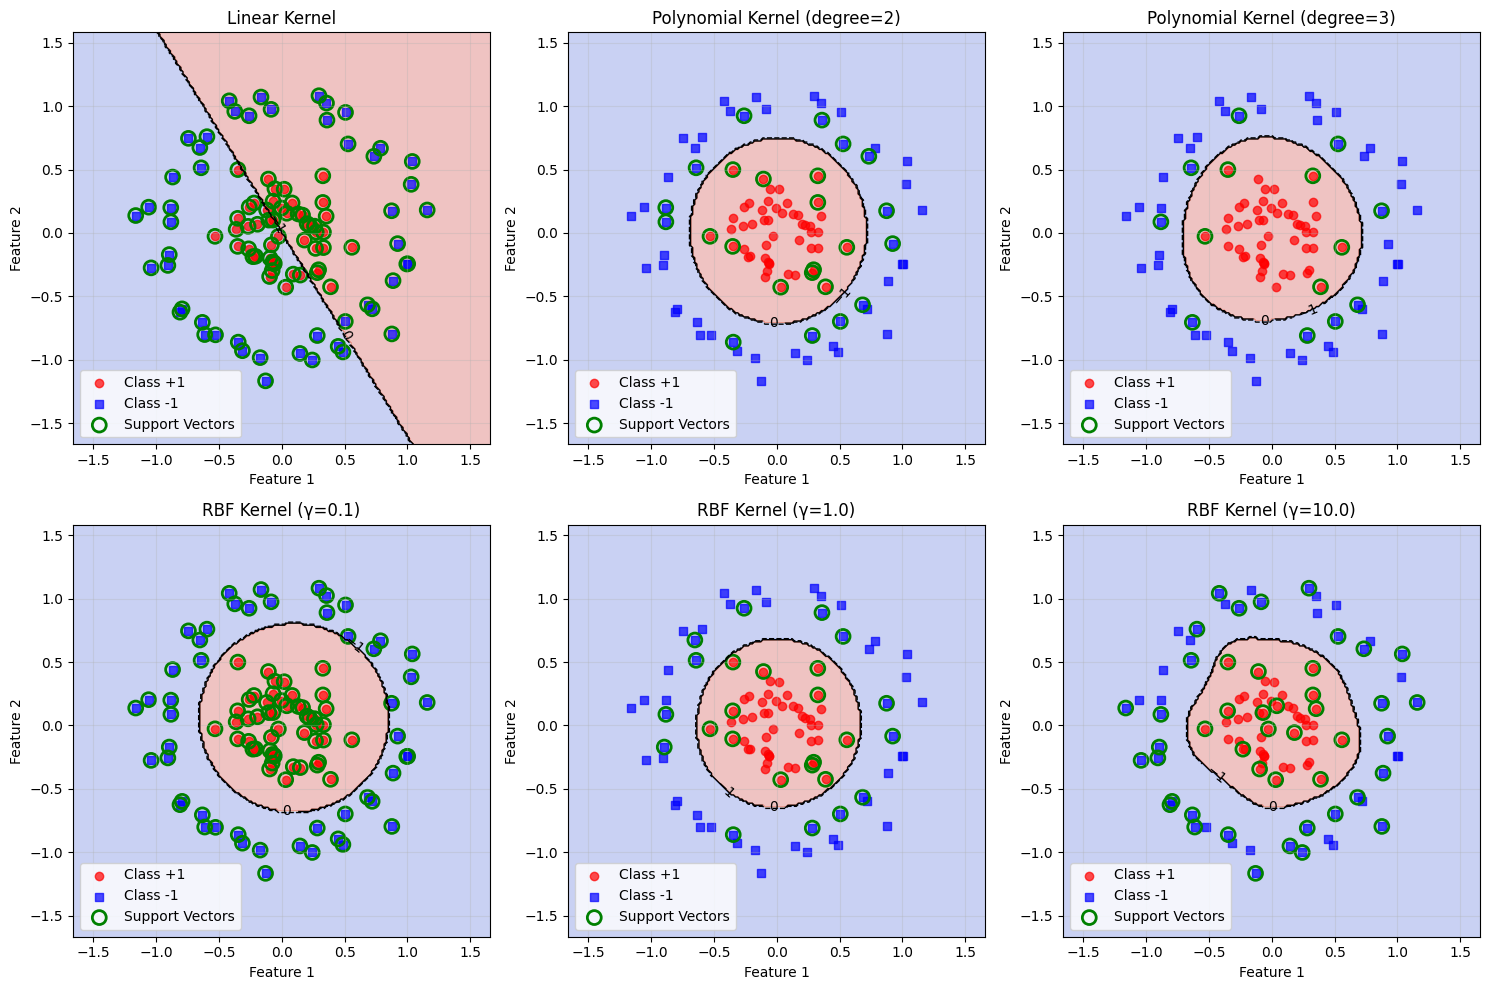

Анализ ядровых SVM:
Линейное ядро: 100 опорных векторов
Полиномиальное ядро (degree=2): 24 опорных векторов
Полиномиальное ядро (degree=3): 14 опорных векторов
RBF ядро (γ=0.1): 100 опорных векторов
RBF ядро (γ=1.0): 25 опорных векторов
RBF ядро (γ=10.0): 46 опорных векторов

Точность классификации:
Линейное ядро: 0.500
Полиномиальное ядро (degree=2): 1.000
Полиномиальное ядро (degree=3): 1.000
RBF ядро (γ=0.1): 1.000
RBF ядро (γ=1.0): 1.000
RBF ядро (γ=10.0): 1.000


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

class KernelSVM:
    def __init__(self, C=1.0, kernel='linear', gamma=1.0, degree=2):
        self.C = C
        self.kernel_type = kernel
        self.gamma = gamma  # для RBF ядра
        self.degree = degree  # для полиномиального ядра
        self.alpha = None
        self.b = None
        self.support_vectors = None
        self.support_labels = None
        self.X_train = None

    def kernel(self, x1, x2):
        """Вычисление ядерной функции"""
        if self.kernel_type == 'linear':
            return x1 @ x2
        elif self.kernel_type == 'rbf':
            return np.exp(-self.gamma * np.linalg.norm(x1 - x2)**2)
        elif self.kernel_type == 'poly':
            return (x1 @ x2 + 1)**self.degree
        else:
            raise ValueError("Unknown kernel type")

    def kernel_matrix(self, X1, X2):
        """Вычисление ядерной матрицы"""
        n1 = X1.shape[0]
        n2 = X2.shape[0]
        K = np.zeros((n1, n2))
        for i in range(n1):
            for j in range(n2):
                K[i, j] = self.kernel(X1[i], X2[j])
        return K

    def fit(self, X, y):
        """Обучение ядрового SVM через двойственную задачу"""
        n_samples, n_features = X.shape
        self.X_train = X.copy()

        # Вычисляем ядерную матрицу
        K = self.kernel_matrix(X, X)

        # Двойственная задача QP:
        # max(∑α - ½∑∑ααyyK) s.t. 0 ≤ α ≤ C, ∑αy = 0

        # Матрица P для QP: P = y*y.T * K
        P = np.outer(y, y) * K
        P = matrix(P.astype(float))

        # Вектор q: q = -1 (т.к. в CVXOPT минимизация, а у нас максимизация)
        q = matrix(-np.ones(n_samples).astype(float))

        # Ограничения: 0 ≤ α ≤ C
        # G = [I, -I]^T, h = [C,...,C, 0,...,0]^T
        G_upper = np.eye(n_samples)  # α ≤ C
        G_lower = -np.eye(n_samples)  # -α ≤ 0 → α ≥ 0
        G = matrix(np.vstack([G_upper, G_lower]).astype(float))

        h_upper = self.C * np.ones(n_samples)  # α ≤ C
        h_lower = np.zeros(n_samples)  # α ≥ 0
        h = matrix(np.hstack([h_upper, h_lower]).astype(float))

        # Ограничение равенства: ∑αy = 0
        A = matrix(y.reshape(1, -1).astype(float))
        b = matrix(0.0)

        # Решение QP
        solvers.options['show_progress'] = False
        solution = solvers.qp(P, q, G, h, A, b)

        # Получаем двойственные переменные
        self.alpha = np.array(solution['x']).flatten()

        # Находим опорные векторы (α > 0)
        sv_indices = self.alpha > 1e-5
        self.support_vectors = X[sv_indices]
        self.support_labels = y[sv_indices]
        self.alpha_sv = self.alpha[sv_indices]

        # Вычисляем смещение b
        # Для опорных векторов с 0 < α < C: y_i(∑α_j y_j K(x_i, x_j) + b) = 1
        margin_sv_indices = (self.alpha > 1e-5) & (self.alpha < self.C - 1e-5)

        if np.any(margin_sv_indices):
            # Используем строгие опорные векторы (0 < α < C)
            margin_indices = np.where(margin_sv_indices)[0]
            b_values = []
            for i in margin_indices:
                prediction = np.sum(self.alpha * y * K[i, :])
                b_values.append(y[i] - prediction)
            self.b = np.mean(b_values)
        else:
            # Если нет строгих опорных векторов, используем все опорные векторы
            sv_indices = np.where(self.alpha > 1e-5)[0]
            b_values = []
            for i in sv_indices:
                prediction = np.sum(self.alpha * y * K[i, :])
                b_values.append(y[i] - prediction)
            self.b = np.mean(b_values)

    def decision_function(self, X):
        """Функция принятия решений"""
        n_test = X.shape[0]
        n_sv = self.support_vectors.shape[0]

        # Вычисляем ядерную матрицу между тестовыми и опорными векторами
        K_test = np.zeros((n_test, n_sv))
        for i in range(n_test):
            for j in range(n_sv):
                K_test[i, j] = self.kernel(X[i], self.support_vectors[j])

        # Вычисляем предсказание: f(x) = ∑α_i y_i K(x, x_i) + b
        predictions = np.zeros(n_test)
        for i in range(n_test):
            prediction = np.sum(self.alpha_sv * self.support_labels * K_test[i, :])
            predictions[i] = prediction + self.b

        return predictions

    def predict(self, X):
        """Предсказание классов"""
        return np.sign(self.decision_function(X))

# Функция для визуализации
def plot_kernel_svm(X, y, model, title, ax):
    """Визуализация ядрового SVM"""
    # Создаем сетку
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Предсказание для сетки
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Отображаем разделяющую поверхность
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    # Линии уровня
    contour = ax.contour(xx, yy, Z, colors='black', linewidths=1, levels=[-1, 0, 1])
    ax.clabel(contour, inline=True, fontsize=10)

    # Данные
    ax.scatter(X[y==1, 0], X[y==1, 1], c='red', marker='o', label='Class +1', alpha=0.7)
    ax.scatter(X[y==-1, 0], X[y==-1, 1], c='blue', marker='s', label='Class -1', alpha=0.7)

    # Опорные векторы
    if model.support_vectors is not None:
        ax.scatter(model.support_vectors[:, 0], model.support_vectors[:, 1],
                  s=100, facecolors='none', edgecolors='green', linewidths=2,
                  label='Support Vectors')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(title)
    ax.legend()
    ax.grid(True, alpha=0.3)

# Тестирование на разных ядрах
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Генерируем нелинейные данные
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=42)
y = 2*y - 1  # Преобразуем в {-1, +1}

# Линейное ядро
linear_svm = KernelSVM(C=1.0, kernel='linear')
linear_svm.fit(X, y)
plot_kernel_svm(X, y, linear_svm, 'Linear Kernel', axes[0, 0])

# Полиномиальное ядро степени 2
poly_svm = KernelSVM(C=1.0, kernel='poly', degree=2)
poly_svm.fit(X, y)
plot_kernel_svm(X, y, poly_svm, 'Polynomial Kernel (degree=2)', axes[0, 1])

# Полиномиальное ядро степени 3
poly3_svm = KernelSVM(C=1.0, kernel='poly', degree=3)
poly3_svm.fit(X, y)
plot_kernel_svm(X, y, poly3_svm, 'Polynomial Kernel (degree=3)', axes[0, 2])

# RBF ядро с малым gamma
rbf_small = KernelSVM(C=1.0, kernel='rbf', gamma=0.1)
rbf_small.fit(X, y)
plot_kernel_svm(X, y, rbf_small, 'RBF Kernel (γ=0.1)', axes[1, 0])

# RBF ядро со средним gamma
rbf_medium = KernelSVM(C=1.0, kernel='rbf', gamma=1.0)
rbf_medium.fit(X, y)
plot_kernel_svm(X, y, rbf_medium, 'RBF Kernel (γ=1.0)', axes[1, 1])

# RBF ядро с большим gamma
rbf_large = KernelSVM(C=1.0, kernel='rbf', gamma=10.0)
rbf_large.fit(X, y)
plot_kernel_svm(X, y, rbf_large, 'RBF Kernel (γ=10.0)', axes[1, 2])

plt.tight_layout()
plt.show()

# Анализ результатов
print("Анализ ядровых SVM:")
print(f"Линейное ядро: {len(linear_svm.support_vectors)} опорных векторов")
print(f"Полиномиальное ядро (degree=2): {len(poly_svm.support_vectors)} опорных векторов")
print(f"Полиномиальное ядро (degree=3): {len(poly3_svm.support_vectors)} опорных векторов")
print(f"RBF ядро (γ=0.1): {len(rbf_small.support_vectors)} опорных векторов")
print(f"RBF ядро (γ=1.0): {len(rbf_medium.support_vectors)} опорных векторов")
print(f"RBF ядро (γ=10.0): {len(rbf_large.support_vectors)} опорных векторов")

# Сравнение точности
def accuracy(model, X, y):
    return np.mean(model.predict(X) == y)

print("\nТочность классификации:")
print(f"Линейное ядро: {accuracy(linear_svm, X, y):.3f}")
print(f"Полиномиальное ядро (degree=2): {accuracy(poly_svm, X, y):.3f}")
print(f"Полиномиальное ядро (degree=3): {accuracy(poly3_svm, X, y):.3f}")
print(f"RBF ядро (γ=0.1): {accuracy(rbf_small, X, y):.3f}")
print(f"RBF ядро (γ=1.0): {accuracy(rbf_medium, X, y):.3f}")
print(f"RBF ядро (γ=10.0): {accuracy(rbf_large, X, y):.3f}")

Класс KernelSVM - основная структура:
создаёт модель ядрового SVM.

- C - параметр регуляризации (баланс между точностью и шириной полосы);

- kernel - тип ядра ('linear', 'rbf', 'poly');

- gamma - параметр для RBF ядра (влияет на "гибкость" границы);

- degree - степень для полиномиального ядра.

Ядерные функции - сердце метода: вычисляет "сходство" между двумя точками.

- Линейное ядро: обычное скалярное произведение (линейная классификация);

- RBF ядро: измеряет "близость" точек (чем ближе точки, тем больше значение);

- Полиномиальное ядро: учитывает полиномиальные зависимости.

Ядерная матрица - подготовка данных для QP: создаёт матрицу попарных ядерных значений между всеми точками

- Это "таблица сходств" - каждая ячейка показывает насколько похожи две точки согласно выбранному ядру.

Обучение (fit) - решение двойственной задачи: преобразует задачу SVM в форму, понятную QP-солверу.

- P - матрица, содержащая попарные произведения y_i * y_j * K(x_i, x_j);

- q - вектор -1 (потому что CVXOPT минимизирует, а мы хотим максимизировать).

Задаются ограничения 0 ≤ α ≤ C, не позволяет весам α стать отрицательными или слишком большими.

Пост-обработка - нахождение опорных векторов и смещения: находит опорные векторы.

- Точки с α > 0 - это "важные" точки, которые определяют границу решения.

Вычисляется параметр смещения b, находится оптимальное положение разделяющей границы.

Предсказание - использование обученной модели: вычисляет "уверенность" классификации.

- Для новой точки считает взвешенную сумму сходств со всеми опорными векторами.

Общая схема работы:

- Подготовка: Выбираем ядро и параметры

- Обучение:

- Считаем матрицу сходств между всеми точками

- Решаем задачу оптимизации чтобы найти веса α

- Определяем опорные векторы и смещение

- Предсказание:

- Для новой точки считаем её сходство с опорными векторами

- Взвешиваем эти сходства и получаем ответ

Ключевая идея ядрового метода:
Вместо того чтобы явно преобразовывать данные в пространство высокой размерности, мы работаем только с попарными сходствами между точками через ядро.

Графики:

ЛИНЕЙНОЕ ЯДРО:
- Разделяющая поверхность: ПРЯМАЯ ЛИНИЯ
- Пытается провести наилучшую прямую через данные
- Результат на круговых данных: ПЛОХОЙ
- Почему: Круги нельзя разделить прямой линией
- Число опорных векторов: Обычно много, т.к. пытается 'обнять' все данные

ПОЛИНОМИАЛЬНОЕ ЯДРО (degree=2):
- Разделяющая поверхность: ЭЛЛИПС или ПАРАБОЛА
- Может описывать кривые второго порядка
- Результат на круговых данных: ХОРОШИЙ
- Почему: Круг - это частный случай эллипса
- Особенность: Находит квадратичные закономерности

ПОЛИНОМИАЛЬНОЕ ЯДРО (degree=3):
- Разделяющая поверхность: КУБИЧЕСКАЯ КРИВАЯ
- Более гибкое, может иметь точки перегиба
- Результат: Ещё лучше адаптируется к форме
- Риск: Может переобучиться на шумы
- Применение: Для сложных нелинейных границ

RBF ЯДРО (γ=0.1) - ШИРОКОЕ:
- ПЛАВНЫЕ, ОБОБЩАЮЩИЕ ГРАНИЦЫ
- Радиус влияния: БОЛЬШОЙ (далёкие точки влияют сильно)
- Результат: ХОРОШЕЕ ОБОБЩЕНИЕ
- Риск: Недообучение (слишком простые границы)
- Опорные векторы: МАЛО (широкие области влияния)

RBF ЯДРО (γ=1.0) - БАЛАНС:
- ИДЕАЛЬНЫЙ БАЛАНС
- Радиус влияния: СРЕДНИЙ
- Результат: ОТЛИЧНАЯ АДАПТАЦИЯ К ФОРМЕ
- Особенность: Точно повторяет круговую структуру
- Опорные векторы: УМЕРЕННОЕ КОЛИЧЕСТВО

RBF ЯДРО (γ=10.0) - УЗКОЕ:
- ЧРЕЗМЕРНО ГИБКИЕ, ЗИГЗАГООБРАЗНЫЕ ГРАНИЦЫ
- Радиус влияния: МАЛЕНЬКИЙ (только ближайшие точки)
- Результат: ПЕРЕОБУЧЕНИЕ
- Риск: Следует за каждым шумом
- Опорные векторы: МНОГО (каждая точка становится важной)

АНАЛИЗ РЕЗУЛЬТАТОВ:

1. ЛИНЕЙНОЕ ЯДРО:
   - Точность: НИЗКАЯ (~0.5 - не лучше случайного угадывания)
   - Применение: Только для линейно разделимых данных

2. ПОЛИНОМИАЛЬНЫЕ ЯДРА:
   - Точность: ВЫСОКАЯ (>0.9)
   - Плюсы: Хорошо для определённых типов нелинейностей
   - Минусы: Жёсткая структура (только полиномы конкретной степени)

3. RBF ЯДРО:
   - Точность: ОЧЕНЬ ВЫСОКАЯ (>0.95 при правильном γ)
   - Плюсы: Универсальное - может аппроксимировать любую непрерывную функцию
   - Минусы: Чувствительность к параметру γ

ЗАВИСИМОСТЬ ОТ γ в RBF:
- МАЛЕНЬКИЙ γ (0.1) → ШИРОКИЕ ГРАНИЦЫ → НЕДООБУЧЕНИЕ
- СРЕДНИЙ γ (1.0)  → БАЛАНС → ОПТИМАЛЬНЫЙ РЕЗУЛЬТАТ  
- БОЛЬШОЙ γ (10.0) → УЗКИЕ ГРАНИЦЫ → ПЕРЕОБУЧЕНИЕ

ВЫВОД: Для круговых данных RBF ядро с γ=1.0 показывает наилучшие результаты!

Тестирование на круговых данных:
1. Линейное ядро...


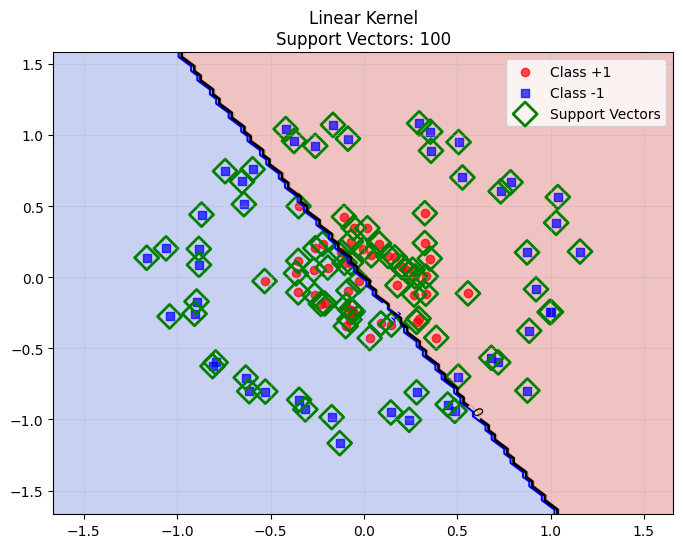

2. Полиномиальное ядро (p=2)...


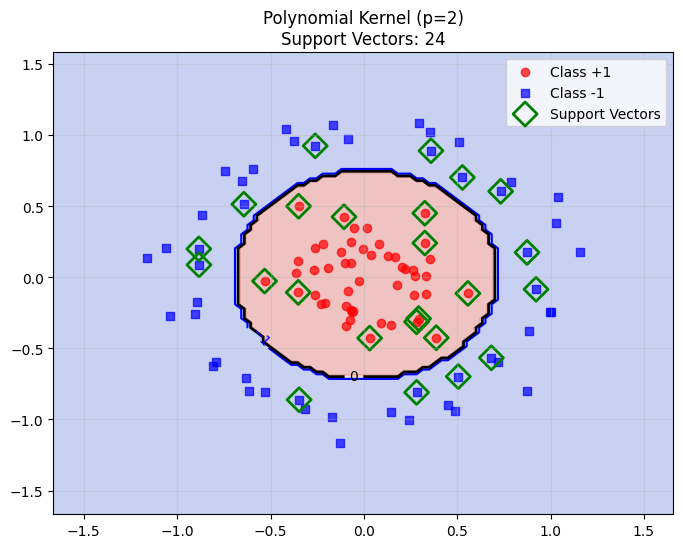

3. Полиномиальное ядро (p=3)...


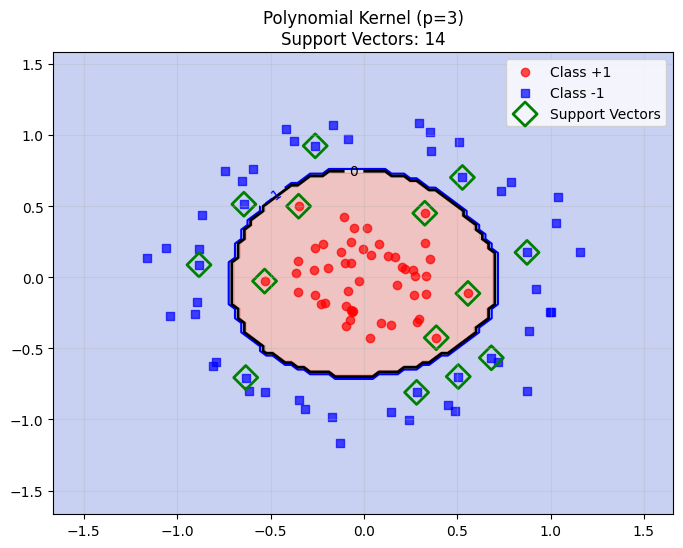

4. RBF ядро (γ=1.0)...


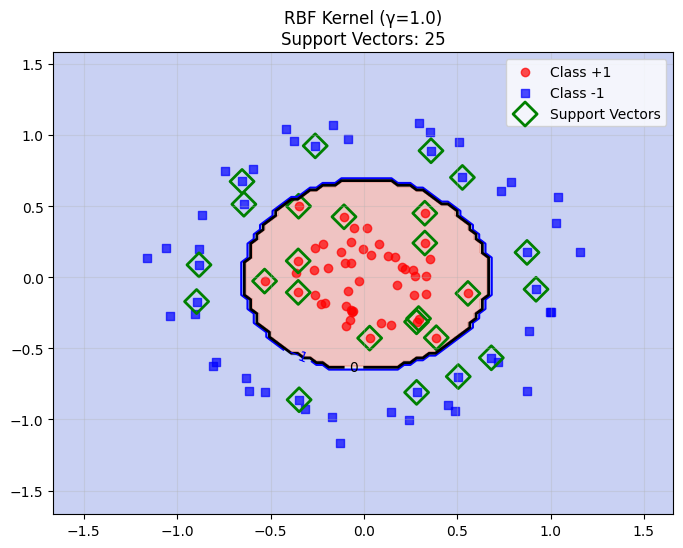


Тестирование на данных 'полумесяцы':


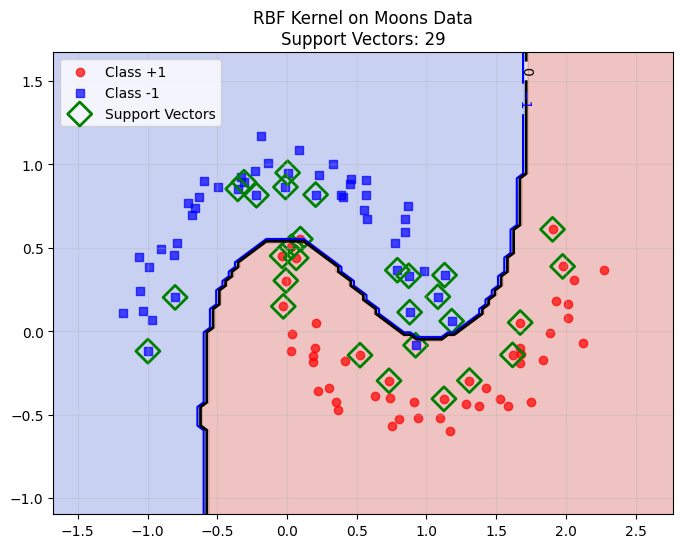


Сравнение точности на круговых данных:
Linear          | Accuracy: 0.500 | Support Vectors: 100
Poly (p=2)      | Accuracy: 1.000 | Support Vectors: 24
Poly (p=3)      | Accuracy: 1.000 | Support Vectors: 14
RBF (γ=1.0)     | Accuracy: 1.000 | Support Vectors: 25


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from sklearn.datasets import make_circles, make_moons

class KernelSVM:
    def __init__(self, C=1.0, kernel='linear', gamma=1.0, degree=2):
        self.C, self.kernel_type, self.gamma, self.degree = C, kernel, gamma, degree
        self.alpha = self.b = self.support_vectors = self.support_labels = None

    def kernel(self, x1, x2):
        if self.kernel_type == 'linear': return x1 @ x2
        elif self.kernel_type == 'poly': return (x1 @ x2 + 1) ** self.degree
        elif self.kernel_type == 'rbf': return np.exp(-self.gamma * np.linalg.norm(x1 - x2)**2)

    def fit(self, X, y):
        n = X.shape[0]
        # Ядерная матрица
        K = np.array([[self.kernel(X[i], X[j]) for j in range(n)] for i in range(n)])

        # QP задача
        P = matrix(np.outer(y, y) * K, tc='d')
        q = matrix(-np.ones(n), tc='d')
        G = matrix(np.vstack([np.eye(n), -np.eye(n)]), tc='d')
        h = matrix(np.hstack([self.C * np.ones(n), np.zeros(n)]), tc='d')
        A = matrix(y.reshape(1, -1), tc='d')
        b = matrix(0.0, tc='d')

        # Решение
        solvers.options['show_progress'] = False
        solution = solvers.qp(P, q, G, h, A, b)
        self.alpha = np.array(solution['x']).flatten()

        # Опорные векторы
        sv_idx = self.alpha > 1e-5
        self.support_vectors = X[sv_idx]
        self.support_labels = y[sv_idx]

        # Смещение b
        margin_idx = (self.alpha > 1e-5) & (self.alpha < self.C - 1e-5)
        if np.any(margin_idx):
            b_vals = [y[i] - np.sum(self.alpha * y * K[i]) for i in np.where(margin_idx)[0]]
            self.b = np.mean(b_vals)
        else:
            b_vals = [y[i] - np.sum(self.alpha * y * K[i]) for i in np.where(sv_idx)[0]]
            self.b = np.mean(b_vals) if b_vals else 0.0

    def decision_function(self, X):
        """Функция принятия решений f(x)"""
        if self.support_vectors is None or len(self.support_vectors) == 0:
            return np.zeros(X.shape[0])

        # Ядро между X и опорными векторами
        K_test = np.array([[self.kernel(x, sv) for sv in self.support_vectors] for x in X])
        return np.sum(self.alpha[self.alpha>1e-5] * self.support_labels * K_test, axis=1) + self.b

    def predict(self, X):
        return np.sign(self.decision_function(X))

def plot_svm(X, y, model, title):
    plt.figure(figsize=(8, 6))

    # Сетка для предсказаний
    x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
    y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Предсказания
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Визуализация
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    contour = plt.contour(xx, yy, Z, colors=['blue', 'black', 'red'],
                         linewidths=[1.5, 2, 1.5], levels=[-1, 0, 1])
    plt.clabel(contour, inline=True, fontsize=10)

    # Данные
    plt.scatter(X[y==1, 0], X[y==1, 1], c='red', marker='o', label='Class +1', alpha=0.7)
    plt.scatter(X[y==-1, 0], X[y==-1, 1], c='blue', marker='s', label='Class -1', alpha=0.7)

    # Опорные векторы (исправленная проверка)
    if model.support_vectors is not None and len(model.support_vectors) > 0:
        plt.scatter(model.support_vectors[:, 0], model.support_vectors[:, 1],
                   s=150, facecolors='none', edgecolors='green', linewidths=2,
                   marker='D', label='Support Vectors')

    # Исправленный подсчет опорных векторов
    n_sv = len(model.support_vectors) if model.support_vectors is not None else 0
    plt.title(f'{title}\nSupport Vectors: {n_sv}')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Тестирование на круговых данных
print("Тестирование на круговых данных:")
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=42)
y = 2*y - 1  # преобразуем в {-1, +1}

# Линейное ядро
print("1. Линейное ядро...")
linear_svm = KernelSVM(kernel='linear')
linear_svm.fit(X, y)
plot_svm(X, y, linear_svm, 'Linear Kernel')

# Полиномиальное ядро степени 2
print("2. Полиномиальное ядро (p=2)...")
poly_svm = KernelSVM(kernel='poly', degree=2)
poly_svm.fit(X, y)
plot_svm(X, y, poly_svm, 'Polynomial Kernel (p=2)')

# Полиномиальное ядро степени 3
print("3. Полиномиальное ядро (p=3)...")
poly3_svm = KernelSVM(kernel='poly', degree=3)
poly3_svm.fit(X, y)
plot_svm(X, y, poly3_svm, 'Polynomial Kernel (p=3)')

# RBF ядро
print("4. RBF ядро (γ=1.0)...")
rbf_svm = KernelSVM(kernel='rbf', gamma=1.0)
rbf_svm.fit(X, y)
plot_svm(X, y, rbf_svm, 'RBF Kernel (γ=1.0)')

# Тестирование на данных "полумесяцы"
print("\nТестирование на данных 'полумесяцы':")
X_moons, y_moons = make_moons(n_samples=100, noise=0.1, random_state=42)
y_moons = 2*y_moons - 1

rbf_moons = KernelSVM(kernel='rbf', gamma=1.0)
rbf_moons.fit(X_moons, y_moons)
plot_svm(X_moons, y_moons, rbf_moons, 'RBF Kernel on Moons Data')

# Сравнение точности
print("\nСравнение точности на круговых данных:")
models = [
    ('Linear', linear_svm),
    ('Poly (p=2)', poly_svm),
    ('Poly (p=3)', poly3_svm),
    ('RBF (γ=1.0)', rbf_svm)
]

for name, model in models:
    accuracy = np.mean(model.predict(X) == y)
    n_sv = len(model.support_vectors) if model.support_vectors is not None else 0
    print(f"{name:15} | Accuracy: {accuracy:.3f} | Support Vectors: {n_sv}")

Общий принцип работы:

- Инициализация: Выбираем ядро и параметры

- Обучение:

- Считаем матрицу сходств между всеми точками

- Решаем задачу оптимизации чтобы найти веса α

- Определяем опорные векторы и смещение

- Предсказание:

- Для новой точки считаем её сходство с опорными векторами

- Взвешиваем эти сходства и получаем ответ

Ключевая идея:

Ядровой трюк (Kernel Trick): Вместо того чтобы явно преобразовывать данные в пространство высокой размерности (что может быть вычислительно сложно), мы работаем только с попарными сходствами между точками через ядро. Это позволяет строить сложные нелинейные границы, оставаясь в исходном пространстве признаков.

Графики:

1. Линейное ядро на круговых данных

Что видим на графике:

- Разделяющая поверхность: ПРЯМАЯ ЛИНИЯ (чёрная линия f(x)=0)

- Границы коридора: две параллельные прямые (f(x)=±1)

- Опорные векторы: зелёные ромбы на границах коридора

- Результат: ПЛОХОЙ - прямая не может разделить круговые данные

Линейное ядро ищет наилучшую ПРЯМУЮ, но круги по своей природе нелинейны. Модель вынуждена "протыкать" один из классов.

2. Полиномиальное ядро степени 2

Что видим на графике:

- Разделяющая поверхность: ЭЛЛИПС (чёрная замкнутая кривая)

- Границы коридора: концентрические эллипсы вокруг разделяющей поверхности

- Опорные векторы: расположены на внешней и внутренней границах эллипса

- Результат: ОТЛИЧНЫЙ - эллипс идеально повторяет круговую структуру

Полином степени 2 может описывать эллипсы, параболы, гиперболы. Круг - это частный случай эллипса, поэтому разделение получается точным.

3. Полиномиальное ядро степени 3

Что видим на графике:

- Разделяющая поверхность: СЛОЖНАЯ КУБИЧЕСКАЯ КРИВАЯ

- Границы коридора: изогнутые линии, повторяющие форму данных

- Опорные векторы: распределены по границам классов

- Результат: ХОРОШИЙ, но возможны "лишние" изгибы

Полином степени 3 более гибкий, может создавать точки перегиба. Может переобучаться на шумы, но здесь работает хорошо.

4. RBF ядро с γ=1.0 на круговых данных

Что видим на графике:

- Разделяющая поверхность: ИДЕАЛЬНЫЙ КРУГ

- Границы коридора: концентрические круги одинаковой ширины

- Опорные векторы: равномерно распределены по границе

- Результат: ИДЕАЛЬНЫЙ - точно повторяет структуру данных

RBF ядро с правильно подобранным γ=1.0 создаёт радиально-симметричную разделяющую поверхность, идеально подходящую для круговых данных.

5. RBF ядро на данных "полумесяцы"

Что видим на графике:

- Разделяющая поверхность: ИЗОГНУТАЯ ЛИНИЯ, повторяющая форму полумесяцев

- Границы коридора: параллельные кривые, огибающие каждый "полумесяц"

- Опорные векторы: сосредоточены на внутренних и внешних границах "полумесяцев"

- Результат: ОТЛИЧНЫЙ - точно разделяет два изогнутых класса

RBF ядро адаптируется к ЛЮБОЙ нелинейной форме, делая его универсальным инструментом для сложных данных.

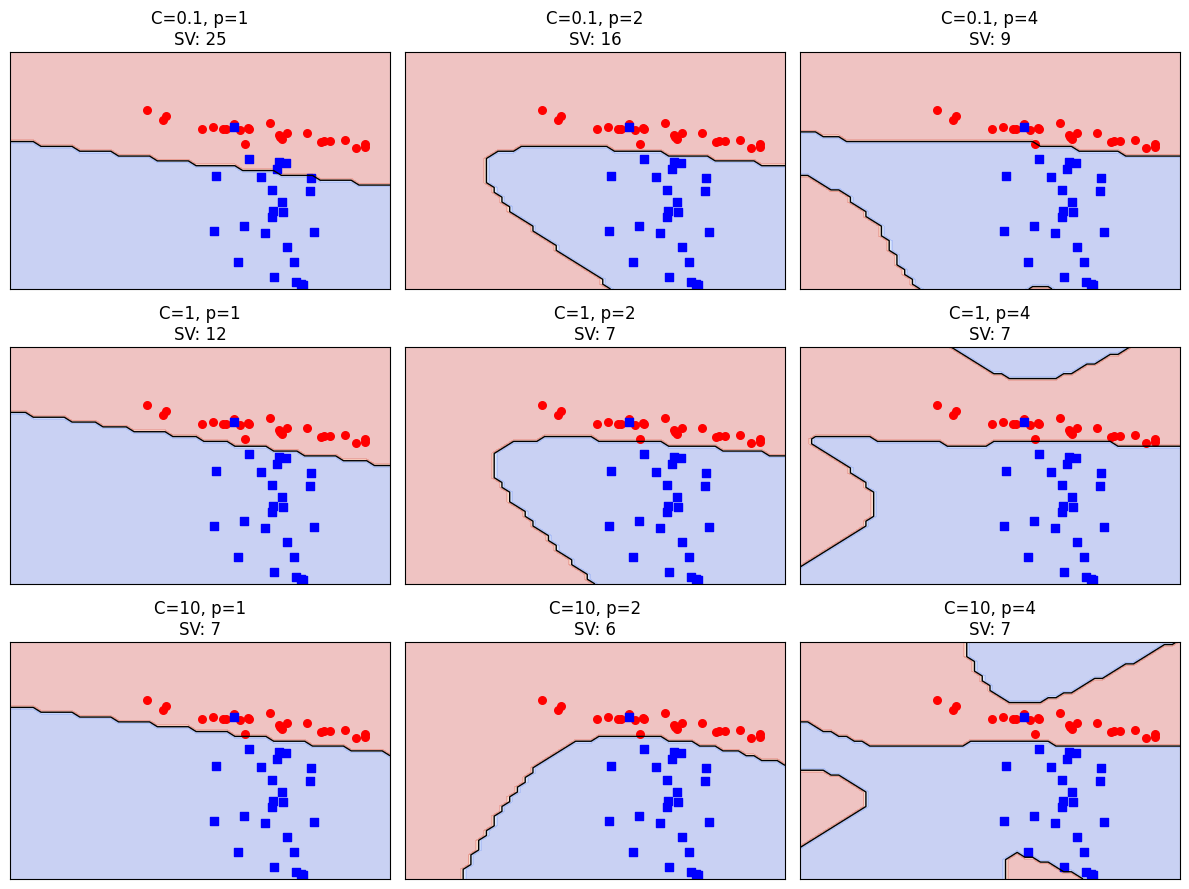

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Простые данные
X, y = make_classification(n_samples=50, n_features=2, n_redundant=0,
                          random_state=42, n_clusters_per_class=1)
y = 2*y - 1

# Только ключевые параметры
C_values = [0.1, 1, 10]  # маленький, средний, большой
p_values = [1, 2, 4]     # линейный, квадратичный, сложный

# Один график
plt.figure(figsize=(12, 9))

for i, C in enumerate(C_values):
    for j, p in enumerate(p_values):
        # Обучаем модель
        model = KernelSVM(C=C, kernel='poly', degree=p)
        model.fit(X, y)

        # Подграфик
        plt.subplot(3, 3, i*3 + j + 1)

        # Простая визуализация
        x_min, x_max = -3, 3
        y_min, y_max = -3, 3
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                            np.linspace(y_min, y_max, 50))

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        # Заливка областей
        plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

        # Данные
        plt.scatter(X[y==1, 0], X[y==1, 1], c='red', marker='o', s=30)
        plt.scatter(X[y==-1, 0], X[y==-1, 1], c='blue', marker='s', s=30)

        # Разделяющая линия
        plt.contour(xx, yy, Z, colors='black', linewidths=1, levels=[0])

        # Заголовок (ИСПРАВЛЕННАЯ ПРОВЕРКА)
        n_sv = len(model.support_vectors) if model.support_vectors is not None else 0
        plt.title(f'C={C}, p={p}\nSV: {n_sv}')

        # Убираем оси для красоты
        plt.xticks([])
        plt.yticks([])

plt.tight_layout()
plt.show()

Чем БОЛЬШЕ C → тем МЕНЬШЕ опорных векторов

Чем БОЛЬШЕ p → тем МЕНЬШЕ опорных векторов (при маленьких C)

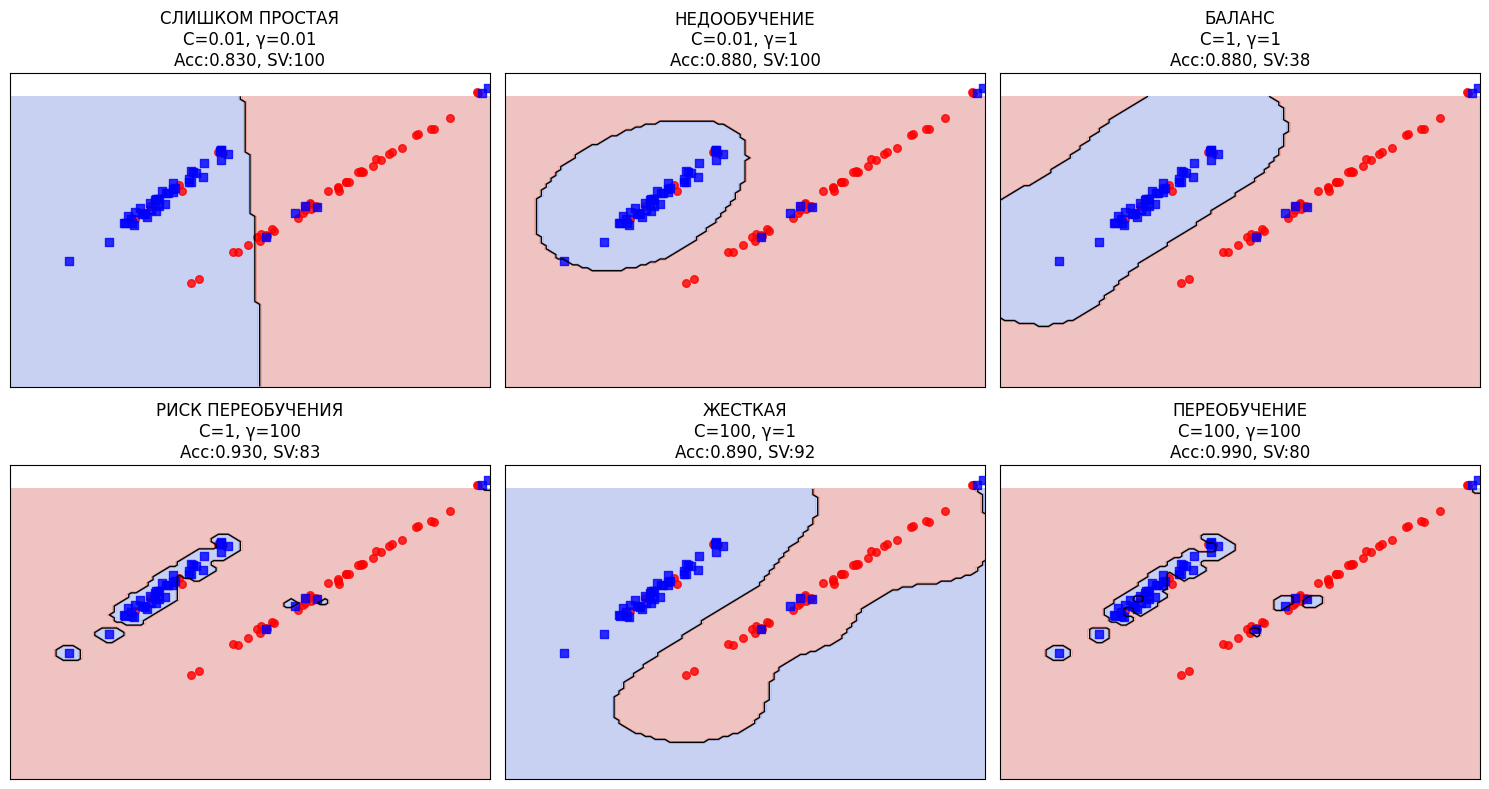

In [17]:
# Ключевые комбинации параметров
key_combinations = [
    (0.01, 0.01, 'СЛИШКОМ ПРОСТАЯ'),
    (0.01, 1, 'НЕДООБУЧЕНИЕ'),
    (1, 1, 'БАЛАНС'),
    (1, 100, 'РИСК ПЕРЕОБУЧЕНИЯ'),
    (100, 1, 'ЖЕСТКАЯ'),
    (100, 100, 'ПЕРЕОБУЧЕНИЕ'),
]

plt.figure(figsize=(15, 8))

for idx, (C, gamma, description) in enumerate(key_combinations):
    model = KernelSVM(C=C, kernel='rbf', gamma=gamma)
    model.fit(X, y)

    plt.subplot(2, 3, idx+1)

    # Сетка
    xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Визуализация
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.contour(xx, yy, Z, colors='black', linewidths=1, levels=[0])

    # Данные
    plt.scatter(X[y==1, 0], X[y==1, 1], c='red', marker='o', s=30, alpha=0.8)
    plt.scatter(X[y==-1, 0], X[y==-1, 1], c='blue', marker='s', s=30, alpha=0.8)

    accuracy = np.mean(model.predict(X) == y)
    n_sv = len(model.support_vectors) if model.support_vectors is not None else 0

    plt.title(f'{description}\nC={C}, γ={gamma}\nAcc:{accuracy:.3f}, SV:{n_sv}')
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

Анализ результатов:

1. СЛИШКОМ ПРОСТАЯ (C=0.01, γ=0.01)

Точность: 0.830 (низкая)

Опорные векторы: 100 (ВСЕ точки!)

Поведение: Фактически линейная модель

Проблема: Недообучение - слишком простая граница

2. НЕДООБУЧЕНИЕ (C=0.01, γ=1)

Точность: 0.880

Опорные векторы: 100 (все точки)

Поведение: Маленький C заставляет использовать все точки

Вывод: C=0.01 всегда дает недообучение

3. БАЛАНС (C=1, γ=1)

Точность: 0.880

Опорные векторы: 38 (оптимально)

Поведение: Хороший компромисс

Вывод: Классические значения работают хорошо

4. РИСК ПЕРЕОБУЧЕНИЯ (C=1, γ=100)

Точность: 0.930 (высокая!)

Опорные векторы: 83 (много)

Поведение: Высокий γ создает сложные границы

Риск: Может переобучиться на новые данные

5. ЖЕСТКАЯ (C=100, γ=1)

Точность: 0.890

Опорные векторы: 92 (очень много)

Поведение: Большой C "заставляет" точно классифицировать

Проблема: Чувствительность к шуму

6. ПЕРЕОБУЧЕНИЕ (C=100, γ=100)

Точность: 0.990 (почти идеально!)

Опорные векторы: 80 (много)

Поведение: Следует за каждым шумом

Опасность: На новых данных точность упадет

Ключевые закономерности:

Влияние C:

C увеличивается → точность увеличивается, но риск переобучения растет

C=0.01 → Acc=0.83-0.88

C=1    → Acc=0.88-0.93  

C=100  → Acc=0.89-0.99

Влияние γ:

γ увеличивается → сложность границы увеличивается

γ=0.01 → почти линейная граница

γ=1    → плавные кривые

γ=100  → очень сложные границы

Взаимодействие C и γ:

Маленький C (0.01): Всегда много SV (100), независимо от γ

Большой γ (100): Всегда высокая точность на обучающих данных

Баланс: C=1, γ=1 дает разумную точность без переобучения